가설을 입력하세요

In [796]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc

import folium
from folium import Marker
from folium.plugins import MarkerCluster
font_location = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

In [755]:
def open_json(file_name, encoding):
    with open(file_name, encoding=encoding) as json_file: 
        json_object = json.load(json_file)
        json_string = json.dumps(json_object)
        json_data = json.loads(json_string)
    return json_data

In [756]:
json_data = open_json('전국도시공원정보표준데이터.json',encoding = 'utf-8')
json_data

{'fields': [{'id': '관리번호'},
  {'id': '공원명'},
  {'id': '공원구분'},
  {'id': '소재지도로명주소'},
  {'id': '소재지지번주소'},
  {'id': '위도'},
  {'id': '경도'},
  {'id': '공원면적'},
  {'id': '공원보유시설(운동시설)'},
  {'id': '공원보유시설(유희시설)'},
  {'id': '공원보유시설(편익시설)'},
  {'id': '공원보유시설(교양시설)'},
  {'id': '공원보유시설(기타시설)'},
  {'id': '지정고시일'},
  {'id': '관리기관명'},
  {'id': '전화번호'},
  {'id': '데이터기준일자'},
  {'id': '제공기관코드'},
  {'id': '제공기관명'}],
 'records': [{'관리번호': '47190-00127',
   '공원명': '백현체육공원',
   '공원구분': '체육공원',
   '소재지도로명주소': '',
   '소재지지번주소': '경상북도 구미시 산동면 백현리 79',
   '위도': '36.1864293331',
   '경도': '128.4784906760',
   '공원면적': '90967',
   '공원보유시설(운동시설)': '',
   '공원보유시설(유희시설)': '',
   '공원보유시설(편익시설)': '',
   '공원보유시설(교양시설)': '',
   '공원보유시설(기타시설)': '',
   '지정고시일': '',
   '관리기관명': '',
   '전화번호': '',
   '데이터기준일자': '2022-06-09',
   '제공기관코드': '5080000',
   '제공기관명': '경상북도 구미시'},
  {'관리번호': '47190-00128',
   '공원명': '둘모아공원',
   '공원구분': '어린이공원',
   '소재지도로명주소': '',
   '소재지지번주소': '경상북도 구미시 봉곡동 584-2',
   '위도': '36.148431',
   '경도': '1

### => json 데이터를 불러온다

# 데이터 원본 분석

In [757]:
def get_df_info(json_data, records_root_name):
    column_list=[]
    all_data=[]
    is_first=True
    for record in json_data[records_root_name]:
        row_data_list=[]
        for key, value in record.items():
            if is_first:
                column_list.append(key)
            row_data_list.append(value)
        all_data.append(row_data_list)
        is_first=False
        
    return column_list, all_data

In [758]:
column_list, all_data = get_df_info(json_data,'records')

In [759]:
df = pd.DataFrame(all_data, columns=column_list)
df.head()

관리번호     공원명   공원구분 소재지도로명주소              소재지지번주소             위도  \
0  47190-00127  백현체육공원   체육공원           경상북도 구미시 산동면 백현리 79  36.1864293331   
1  47190-00128   둘모아공원  어린이공원            경상북도 구미시 봉곡동 584-2      36.148431   
2  47190-00129   다붓소공원    소공원           경상북도 구미시 봉곡동 765 일원      36.155883   
3  47190-00130   다붓1공원  어린이공원            경상북도 구미시 봉곡동 457-1      36.156392   
4  47190-00131   다붓2공원  어린이공원              경상북도 구미시 봉곡동 767  36.1548081316   

               경도   공원면적 공원보유시설(운동시설) 공원보유시설(유희시설) 공원보유시설(편익시설) 공원보유시설(교양시설)  \
0  128.4784906760  90967                                                       
1  128.3165938966   4279                                                       
2      128.311526    805                                                       
3      128.314372   1585                                                       
4      128.314372   1637                                                       

  공원보유시설(기타시설) 지정고시일 관리기관명 전화번호     데이터기준일자   제공기관코드     제공기관명  
0                                2022-06-09  5080000  경상북도 구미시  
1                                2022-06-09  5080000  경상북도 구미시  
2                                2022-06-09  5080000  경상북도 구미시  
3                                2022-06-09  5080000  경상북도 구미시  
4                                2022-06-09  5080000  경상북도 구미시

### => json파일을 Df형식으로 만들어 주었다

In [760]:
df.shape

(16764, 19)

In [761]:
df= df[['공원명','공원구분','위도','경도','소재지지번주소','공원보유시설(운동시설)','공원보유시설(유희시설)','공원보유시설(편익시설)','공원보유시설(교양시설)','공원보유시설(기타시설)']]
df

공원명   공원구분             위도              경도              소재지지번주소  \
0      백현체육공원   체육공원  36.1864293331  128.4784906760  경상북도 구미시 산동면 백현리 79   
1       둘모아공원  어린이공원      36.148431  128.3165938966   경상북도 구미시 봉곡동 584-2   
2       다붓소공원    소공원      36.155883      128.311526  경상북도 구미시 봉곡동 765 일원   
3       다붓1공원  어린이공원      36.156392      128.314372   경상북도 구미시 봉곡동 457-1   
4       다붓2공원  어린이공원  36.1548081316      128.314372     경상북도 구미시 봉곡동 767   
...       ...    ...            ...             ...                  ...   
16759    오랏공원  어린이공원      36.348581      126.608418    충청남도 보령시 동대동 1607   
16760    샛별공원  어린이공원    36.34756191      126.604487    충청남도 보령시 동대동 1757   
16761   동대2공원   근린공원      36.351672      126.613315  충청남도 보령시 동대동 319-34   
16762   한성필공원  어린이공원    36.35119229     126.6160855    충청남도 보령시 동대동 1971   
16763    동대공원   근린공원    36.34736502     126.6113682    충청남도 보령시 동대동 1968   

       공원보유시설(운동시설)       공원보유시설(유희시설)   공원보유시설(편익시설) 공원보유시설(교양시설)  \
0                                                                    
1                                                                    
2                                                                    
3                                                                    
4                                                                    
...             ...                ...            ...          ...   
16759  농구장+운동시설(7종)       조합놀이대+흔들놀이기구  정자+파고라+의자+화장실                
16760      운동시설(4종)              조합놀이대     파고라+의자+화장실                
16761           농구장                                정자                
16762                      조합놀이대+시소+그네             정자                
16763           풋살장  바닥분수+조합놀이대+흔들놀이기구         파고라+의자                

      공원보유시설(기타시설)  
0                   
1                   
2                   
3                   
4                   
...            ...  
16759               
16760               
16761               
16762               
16763               

[16764 rows x 10 columns]

In [762]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16764 entries, 0 to 16763
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   공원명           16764 non-null  object
 1   공원구분          16764 non-null  object
 2   위도            16764 non-null  object
 3   경도            16764 non-null  object
 4   소재지지번주소       16764 non-null  object
 5   공원보유시설(운동시설)  16764 non-null  object
 6   공원보유시설(유희시설)  16764 non-null  object
 7   공원보유시설(편익시설)  16764 non-null  object
 8   공원보유시설(교양시설)  16764 non-null  object
 9   공원보유시설(기타시설)  16764 non-null  object
dtypes: object(10)
memory usage: 1.3+ MB


### => df의 위도와 경도는 float 타입으로 변환해줘야 한다

In [763]:
df.isnull().sum()

공원명             0
공원구분            0
위도              0
경도              0
소재지지번주소         0
공원보유시설(운동시설)    0
공원보유시설(유희시설)    0
공원보유시설(편익시설)    0
공원보유시설(교양시설)    0
공원보유시설(기타시설)    0
dtype: int64

In [764]:
df = df[(df['경도'] != "") & (df['위도'] != "")]

In [765]:
len(df)

16606

In [766]:
df['위도'] = df['위도'].astype('float')
df['경도'] = df['경도'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16606 entries, 0 to 16763
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   공원명           16606 non-null  object 
 1   공원구분          16606 non-null  object 
 2   위도            16606 non-null  float64
 3   경도            16606 non-null  float64
 4   소재지지번주소       16606 non-null  object 
 5   공원보유시설(운동시설)  16606 non-null  object 
 6   공원보유시설(유희시설)  16606 non-null  object 
 7   공원보유시설(편익시설)  16606 non-null  object 
 8   공원보유시설(교양시설)  16606 non-null  object 
 9   공원보유시설(기타시설)  16606 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.4+ MB


C:\Users\TJ\AppData\Local\Temp\ipykernel_768\1932343848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['위도'] = df['위도'].astype('float')
C:\Users\TJ\AppData\Local\Temp\ipykernel_768\1932343848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['경도'] = df['경도'].astype('float')


### => 원본데이터 분석 끝

결측치, 이상치 처리방안 결정

In [767]:
df[df['소재지지번주소'] == '']

공원명   공원구분         위도          경도 소재지지번주소   공원보유시설(운동시설)  \
571          서림공원   근린공원  35.732919  126.731487                          
1832   별내택지어린이공원3  어린이공원  37.662716  127.116471                          
2127          본촌2  어린이공원  35.093155  126.776242                          
2180         온천공원   근린공원  37.280266  127.450371          축구장+배드민턴장+농구장   
2181         수변공원   수변공원  37.268120  127.460527              배드민턴장+족구장   
...           ...    ...        ...         ...     ...            ...   
15768        소공원4    소공원  34.970122  127.486622                          
15769        소공원5    소공원  34.971059  127.477264                          
15770        소공원6    소공원  34.971797  127.494337                          
15771        소공원7    소공원  34.973273  127.483943                          
15787       소공원24    소공원  34.952089  127.487072                          

      공원보유시설(유희시설) 공원보유시설(편익시설) 공원보유시설(교양시설) 공원보유시설(기타시설)  
571                                                        
1832                                                       
2127                                                       
2180         조합놀이대      주차장+화장실         대공연장               
2181         조합놀이대          화장실                            
...            ...          ...          ...          ...  
15768                                                      
15769                                                      
15770                                                      
15771                                                      
15787                                                인공수로  

[334 rows x 10 columns]

In [768]:
df[df['공원명']== '']

Empty DataFrame
Columns: [공원명, 공원구분, 위도, 경도, 소재지지번주소, 공원보유시설(운동시설), 공원보유시설(유희시설), 공원보유시설(편익시설), 공원보유시설(교양시설), 공원보유시설(기타시설)]
Index: []

In [769]:
df[df['공원구분']== '']

Empty DataFrame
Columns: [공원명, 공원구분, 위도, 경도, 소재지지번주소, 공원보유시설(운동시설), 공원보유시설(유희시설), 공원보유시설(편익시설), 공원보유시설(교양시설), 공원보유시설(기타시설)]
Index: []

In [770]:
len(df[df['공원보유시설(운동시설)']== ''])

11890

In [771]:
len(df[df['공원보유시설(유희시설)']== ''])

10529

In [772]:
len(df[df['공원보유시설(편익시설)']== ''])

11658

In [773]:
len(df[df['공원보유시설(교양시설)']== ''])

15833

In [774]:
len(df[df['공원보유시설(기타시설)']== ''])

14117

In [775]:
df = df.replace('','[시설미보유]')
df

공원명   공원구분         위도          경도              소재지지번주소  \
0      백현체육공원   체육공원  36.186429  128.478491  경상북도 구미시 산동면 백현리 79   
1       둘모아공원  어린이공원  36.148431  128.316594   경상북도 구미시 봉곡동 584-2   
2       다붓소공원    소공원  36.155883  128.311526  경상북도 구미시 봉곡동 765 일원   
3       다붓1공원  어린이공원  36.156392  128.314372   경상북도 구미시 봉곡동 457-1   
4       다붓2공원  어린이공원  36.154808  128.314372     경상북도 구미시 봉곡동 767   
...       ...    ...        ...         ...                  ...   
16759    오랏공원  어린이공원  36.348581  126.608418    충청남도 보령시 동대동 1607   
16760    샛별공원  어린이공원  36.347562  126.604487    충청남도 보령시 동대동 1757   
16761   동대2공원   근린공원  36.351672  126.613315  충청남도 보령시 동대동 319-34   
16762   한성필공원  어린이공원  36.351192  126.616085    충청남도 보령시 동대동 1971   
16763    동대공원   근린공원  36.347365  126.611368    충청남도 보령시 동대동 1968   

       공원보유시설(운동시설)       공원보유시설(유희시설)   공원보유시설(편익시설) 공원보유시설(교양시설)  \
0           [시설미보유]            [시설미보유]        [시설미보유]      [시설미보유]   
1           [시설미보유]            [시설미보유]        [시설미보유]      [시설미보유]   
2           [시설미보유]            [시설미보유]        [시설미보유]      [시설미보유]   
3           [시설미보유]            [시설미보유]        [시설미보유]      [시설미보유]   
4           [시설미보유]            [시설미보유]        [시설미보유]      [시설미보유]   
...             ...                ...            ...          ...   
16759  농구장+운동시설(7종)       조합놀이대+흔들놀이기구  정자+파고라+의자+화장실      [시설미보유]   
16760      운동시설(4종)              조합놀이대     파고라+의자+화장실      [시설미보유]   
16761           농구장            [시설미보유]             정자      [시설미보유]   
16762       [시설미보유]        조합놀이대+시소+그네             정자      [시설미보유]   
16763           풋살장  바닥분수+조합놀이대+흔들놀이기구         파고라+의자      [시설미보유]   

      공원보유시설(기타시설)  
0          [시설미보유]  
1          [시설미보유]  
2          [시설미보유]  
3          [시설미보유]  
4          [시설미보유]  
...            ...  
16759      [시설미보유]  
16760      [시설미보유]  
16761      [시설미보유]  
16762      [시설미보유]  
16763      [시설미보유]  

[16606 rows x 10 columns]

---

# Step1

In [776]:
df['공원구분'].unique()

array(['체육공원', '어린이공원', '소공원', '근린공원', '수변공원', '문화공원', '묘지공원', '역사공원',
       '기타', '도시자연공원구역', '도시농업공원', '기타공원', '주제공원', '도시자연공원', '마을숲',
       '마을마당'], dtype=object)

In [777]:
df['공원구분'].value_counts()

어린이공원       8832
근린공원        3783
소공원         2541
문화공원         359
수변공원         323
기타           232
체육공원         230
역사공원         177
마을마당          49
묘지공원          35
기타공원          30
도시농업공원         7
도시자연공원         3
도시자연공원구역       2
주제공원           2
마을숲            1
Name: 공원구분, dtype: int64

In [778]:
df['공원구분']=df['공원구분'].replace('기타공원','기타')
df['공원구분']=df['공원구분'].replace('마을마당','기타')
df['공원구분']=df['공원구분'].replace('묘지공원','기타')
df['공원구분']=df['공원구분'].replace('도시농업공원','기타')
df['공원구분']=df['공원구분'].replace('도시자연공원','기타')
df['공원구분']=df['공원구분'].replace('도시자연공원구역','기타')
df['공원구분']=df['공원구분'].replace('주제공원','기타')
df['공원구분']=df['공원구분'].replace('마을숲','기타')

df['공원구분'].value_counts()

어린이공원    8832
근린공원     3783
소공원      2541
기타        361
문화공원      359
수변공원      323
체육공원      230
역사공원      177
Name: 공원구분, dtype: int64

In [779]:
df['공원구분'].replace('기타공원','기타', inplace=True)
df['공원구분'].replace('마을마당','기타', inplace=True)
df['공원구분'].replace('묘지공원','기타', inplace=True)
df['공원구분'].replace('도시농업공원','기타', inplace=True)
df['공원구분'].replace('도시자연공원','기타', inplace=True)
df['공원구분'].replace('도시자연공원구역','기타', inplace=True)
df['공원구분'].replace('주제공원','기타', inplace=True)
df['공원구분'].replace('마을숲','기타', inplace=True)

df['공원구분'].value_counts()

어린이공원    8832
근린공원     3783
소공원      2541
기타        361
문화공원      359
수변공원      323
체육공원      230
역사공원      177
Name: 공원구분, dtype: int64

In [780]:
df['공원구분'].unique()

array(['체육공원', '어린이공원', '소공원', '근린공원', '수변공원', '문화공원', '기타', '역사공원'],
      dtype=object)

### => 공원분류 중 100건이 안되는 데이터는 기타로 묶어서 분류 해 주었다

In [781]:
park_list2=df.groupby('공원구분')['공원구분'].count().tolist()
park_list2

[3783, 361, 359, 2541, 323, 8832, 177, 230]

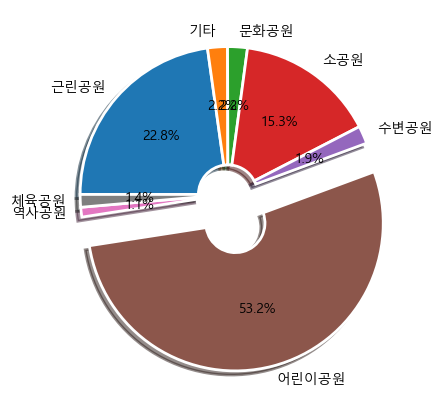

In [782]:
#plt.style.use('default')

labels = ['근린공원','기타','문화공원','소공원','수변공원','어린이공원','역사공원','체육공원']
explode = [0, 0,0, 0, 0, 0.2, 0, 0]
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 2}
plt.pie(park_list2, labels=labels, autopct='%.1f%%', startangle=180, counterclock=False, shadow = True, wedgeprops=wedgeprops,explode=explode)

plt.show()

In [ ]:
# m = folium.Map(location=[37.541, 126.986],
#                zoom_start=11, 
#                width=750, 
#                height=650
#               )
# m

---

# Step2

In [784]:
transform_a = df[df['공원구분'] == '어린이공원']
transform_a=transform_a[transform_a['소재지지번주소'].str.contains('서울')]
transform_a

공원명   공원구분         위도          경도                소재지지번주소  \
214       목련어린이공원  어린이공원  37.587380  126.880225      서울특별시 마포구 상암동1742   
215      산수유어린이공원  어린이공원  37.585485  126.879008      서울특별시 마포구 상암동1744   
216     산딸나무어린이공원  어린이공원  37.583547  126.877927      서울특별시 마포구 상암동1753   
217    애오개도담어린이공원  어린이공원  37.553433  126.958529    서울특별시 마포구 아현동 800-6   
218      쌍룡산어린이공원  어린이공원  37.552173  126.950512      서울특별시 마포구 아현동 769   
...           ...    ...        ...         ...                    ...   
15266        한  신  어린이공원  37.588130  127.076900  서울특별시 중랑구 면목3·8 30-38   
15267        이  화  어린이공원  37.586990  127.100300    서울특별시 중랑구 상봉2 114-1   
15268     면목1(가칭)  어린이공원  37.580278  127.093056   서울특별시 중랑구 상봉2 122-31   
15269        봉  황  어린이공원  37.595020  127.084800   서울특별시 중랑구 상봉2 136-35   
15270        상  봉  어린이공원  37.593090  127.082500   서울특별시 중랑구 중화2 302-57   

      공원보유시설(운동시설) 공원보유시설(유희시설) 공원보유시설(편익시설) 공원보유시설(교양시설) 공원보유시설(기타시설)  
214        [시설미보유]      [시설미보유]      [시설미보유]      [시설미보유]      [시설미보유]  
215        [시설미보유]      [시설미보유]      [시설미보유]      [시설미보유]      [시설미보유]  
216        [시설미보유]      [시설미보유]      [시설미보유]      [시설미보유]      [시설미보유]  
217        [시설미보유]      [시설미보유]      [시설미보유]      [시설미보유]      [시설미보유]  
218        [시설미보유]      [시설미보유]      [시설미보유]      [시설미보유]      [시설미보유]  
...            ...          ...          ...          ...          ...  
15266      [시설미보유]      [시설미보유]      [시설미보유]      [시설미보유]      [시설미보유]  
15267      [시설미보유]      [시설미보유]      [시설미보유]      [시설미보유]      [시설미보유]  
15268      [시설미보유]      [시설미보유]      [시설미보유]      [시설미보유]      [시설미보유]  
15269      [시설미보유]      [시설미보유]      [시설미보유]      [시설미보유]      [시설미보유]  
15270      [시설미보유]      [시설미보유]      [시설미보유]      [시설미보유]      [시설미보유]  

[1035 rows x 10 columns]

In [785]:
for name, lat, lng, m_num  in zip(transform_a['공원구분'],transform_a['위도'],transform_a['경도'],transform_a['공원명']):
#     if kbn =='구립도서관' :
#         color = 'green'
#     else : 
#         color = 'blue'
    Marker(location =[lat,lng],
           popup=m_num,
           tooltip=m_num,
           icon=folium.Icon(color='orange',icon='bookmark')
           ).add_to(m)
#m

In [786]:
#ab = transform_a['소재지지번주소'].tolist()[0].split()[1]
ab = transform_a['소재지지번주소'].tolist()
ab

['서울특별시 마포구 상암동1742',
 '서울특별시 마포구 상암동1744',
 '서울특별시 마포구 상암동1753',
 '서울특별시 마포구 아현동 800-6',
 '서울특별시 마포구 아현동 769',
 '서울특별시 마포구 용강동 63-2',
 '서울특별시 마포구 아현동 802번지 일대',
 '서울특별시 마포구 망원동 458-64',
 '서울특별시 마포구 창전동 26-1',
 '서울특별시 마포구 신수동 95-5일원',
 '서울특별시 마포구 서교동 479-1',
 '서울특별시 마포구 동교동 168-1',
 '서울특별시 마포구 동교동 197-17',
 '서울특별시 마포구 서교동 489',
 '서울특별시 마포구 합정동 394-1',
 '서울특별시 마포구 망원동 381-1',
 '서울특별시 마포구 망원동 408-3',
 '서울특별시 마포구 망원2동 436-1',
 '서울특별시 마포구 망원2동 509-1',
 '서울특별시 마포구 연남동 563-5',
 '서울특별시 마포구 연남동 250-1',
 '서울특별시 마포구 성산동 113-2',
 '서울특별시 마포구 성산동 588-8',
 '서울특별시 마포구 성산동 587-18 일대',
 '서울특별시 마포구 성산동 667-1',
 '서울특별시 마포구 성산동 147-5',
 '서울특별시 마포구 성산동 200-50',
 '서울특별시 마포구 성산동 200-335',
 '서울특별시 마포구 성산동 199-11',
 '서울특별시 마포구 중동 36-27',
 '서울특별시 마포구 중동 228',
 '서울특별시 마포구 중동 36-34',
 '서울특별시 마포구 중동 40-5 일대',
 '서울특별시 마포구 상암동 1619',
 '서울특별시 마포구 상암동 14-5',
 '서울특별시 마포구 상암동 1636',
 '서울특별시 마포구 상암동 1656',
 '서울특별시 마포구 상암동 1681',
 '서울특별시 동작구 상도동 36-1',
 '서울특별시 동작구 상도1동 558',
 '서울특별시 마포구 공덕동 470-1',
 '서울특별시 마포구 공덕동 467-1,2

In [787]:
ab_list=[]
for i in ab : 
    ab_list.append(i.split()[1])
ab_list

['마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '동작구',
 '동작구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '동작구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '양천구',
 '양천구',
 '양천구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '양천구',
 '양천구',
 '강동구',
 '강동구',
 '강동구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '양천구',


In [788]:
transform_a['행정구별'] = ab_list
transform_a

공원명   공원구분         위도          경도                소재지지번주소  \
214       목련어린이공원  어린이공원  37.587380  126.880225      서울특별시 마포구 상암동1742   
215      산수유어린이공원  어린이공원  37.585485  126.879008      서울특별시 마포구 상암동1744   
216     산딸나무어린이공원  어린이공원  37.583547  126.877927      서울특별시 마포구 상암동1753   
217    애오개도담어린이공원  어린이공원  37.553433  126.958529    서울특별시 마포구 아현동 800-6   
218      쌍룡산어린이공원  어린이공원  37.552173  126.950512      서울특별시 마포구 아현동 769   
...           ...    ...        ...         ...                    ...   
15266        한  신  어린이공원  37.588130  127.076900  서울특별시 중랑구 면목3·8 30-38   
15267        이  화  어린이공원  37.586990  127.100300    서울특별시 중랑구 상봉2 114-1   
15268     면목1(가칭)  어린이공원  37.580278  127.093056   서울특별시 중랑구 상봉2 122-31   
15269        봉  황  어린이공원  37.595020  127.084800   서울특별시 중랑구 상봉2 136-35   
15270        상  봉  어린이공원  37.593090  127.082500   서울특별시 중랑구 중화2 302-57   

      공원보유시설(운동시설) 공원보유시설(유희시설) 공원보유시설(편익시설) 공원보유시설(교양시설) 공원보유시설(기타시설) 행정구별  
214        [시설미보유]      [시설미보유]      [시설미보유]      [시설미보유]      [시설미보유]  마포구  
215        [시설미보유]      [시설미보유]      [시설미보유]      [시설미보유]      [시설미보유]  마포구  
216        [시설미보유]      [시설미보유]      [시설미보유]      [시설미보유]      [시설미보유]  마포구  
217        [시설미보유]      [시설미보유]      [시설미보유]      [시설미보유]      [시설미보유]  마포구  
218        [시설미보유]      [시설미보유]      [시설미보유]      [시설미보유]      [시설미보유]  마포구  
...            ...          ...          ...          ...          ...  ...  
15266      [시설미보유]      [시설미보유]      [시설미보유]      [시설미보유]      [시설미보유]  중랑구  
15267      [시설미보유]      [시설미보유]      [시설미보유]      [시설미보유]      [시설미보유]  중랑구  
15268      [시설미보유]      [시설미보유]      [시설미보유]      [시설미보유]      [시설미보유]  중랑구  
15269      [시설미보유]      [시설미보유]      [시설미보유]      [시설미보유]      [시설미보유]  중랑구  
15270      [시설미보유]      [시설미보유]      [시설미보유]      [시설미보유]      [시설미보유]  중랑구  

[1035 rows x 11 columns]

In [791]:
transform_a = transform_a[['공원명','공원구분','위도','경도','행정구별','공원보유시설(운동시설)','공원보유시설(유희시설)','공원보유시설(편익시설)','공원보유시설(교양시설)','공원보유시설(기타시설)']]

In [793]:
transform_a['행정구별'].unique()

array(['마포구', '동작구', '강동구', '강북구', '양천구', '광진구', '강남구', '동대문구', '영등포구',
       '서대문구', '관악구', '노원구', '중구', '종로구', '금천구', '성동구', '은평구', '성북구',
       '송파구', '구로구', '용산구', '강서구', '도봉구', '중랑구'], dtype=object)

In [800]:
m2 = folium.Map(location=[37.541, 126.986],
               zoom_start=11, 
               width=750, 
               height=650
              )

In [801]:
marker_cluster = MarkerCluster().add_to(m2)

In [805]:
for lat, long, lng, m_num in zip(transform_a['위도'], transform_a['경도'],transform_a['공원구분'],transform_a['공원명']):
    folium.Marker([lat, long], 
                  icon = folium.Icon(color="green"),
                  popup=lng,
                  tooltip=m_num).add_to(marker_cluster)
m2